## Data Science Nigeria Staff Promotion Algorithm
Author:🧕🏿 Hasanat Owoseni\
Date : 25th September, 2019

### STEPS 
1. Import Libraies and Dataset
2. Merge the data set together (train and test)
3. change the way the column names are formatted: (uppercases to samller), no special char except underscore

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### The Dataset 

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df_train.head(3)

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 19 columns):
EmployeeNo                             38312 non-null object
Division                               38312 non-null object
Qualification                          36633 non-null object
Gender                                 38312 non-null object
Channel_of_Recruitment                 38312 non-null object
Trainings_Attended                     38312 non-null int64
Year_of_birth                          38312 non-null int64
Last_performance_score                 38312 non-null float64
Year_of_recruitment                    38312 non-null int64
Targets_met                            38312 non-null int64
Previous_Award                         38312 non-null int64
Training_score_average                 38312 non-null int64
State_Of_Origin                        38312 non-null object
Foreign_schooled                       38312 non-null object
Marital_Status                         383

In [6]:
df_test.head(3)

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers
0,YAK/S/00005,Information Technology and Solution Support,First Degree or HND,Male,Agency and others,2,1976,7.5,2017,0,0,65,FCT,Yes,Married,No,No,1
1,YAK/S/00011,Information Technology and Solution Support,NaN,Male,Direct Internal process,2,1991,0.0,2018,0,0,69,OGUN,Yes,Married,No,No,1
2,YAK/S/00015,Research and Innovation,"MSc, MBA and PhD",Male,Direct Internal process,2,1984,7.5,2012,0,0,76,KANO,Yes,Married,No,No,1


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16496 entries, 0 to 16495
Data columns (total 18 columns):
EmployeeNo                             16496 non-null object
Division                               16496 non-null object
Qualification                          15766 non-null object
Gender                                 16496 non-null object
Channel_of_Recruitment                 16496 non-null object
Trainings_Attended                     16496 non-null int64
Year_of_birth                          16496 non-null int64
Last_performance_score                 16496 non-null float64
Year_of_recruitment                    16496 non-null int64
Targets_met                            16496 non-null int64
Previous_Award                         16496 non-null int64
Training_score_average                 16496 non-null int64
State_Of_Origin                        16496 non-null object
Foreign_schooled                       16496 non-null object
Marital_Status                         164

### Dataframe merging 
The test data frame doesn't include the Promoted_or_not column. \
The reason I'm merging it is so I can easily clean the test and train dataframe as a dataframe which is faster\ 
rather  than cleaning them individually.\

Hence, I will be adding the missing column `promoted_or_not` column. Populate it with a constant : `15`


In [8]:
 df_test['Promoted_or_Not'] = 15

In [62]:
df = pd.concat([df_train, df_test])

In [63]:
#remove the irregularity in the dataframe's column using string methods
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [64]:
df.sample(3)

,employeeno,division,qualification,gender,channel_of_recruitment,trainings_attended,year_of_birth,last_performance_score,year_of_recruitment,targets_met,previous_award,training_score_average,state_of_origin,foreign_schooled,marital_status,past_disciplinary_action,previous_intradepartmental_movement,no_of_previous_employers,promoted_or_not
15137,YAK/S/50498,Customer Support and Field Operations,First Degree or HND,Male,Direct Internal process,3,1991,7.5,2015,1,0,55,ADAMAWA,Yes,Married,No,No,2,15
38101,YAK/S/54501,Commercial Sales and Marketing,"MSc, MBA and PhD",Male,Direct Internal process,2,1993,7.5,2016,1,0,46,LAGOS,Yes,Married,No,No,1,0
21884,YAK/S/31232,Information and Strategy,First Degree or HND,Male,Agency and others,3,1988,12.5,2009,1,0,78,LAGOS,Yes,Married,No,No,1,0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 0 to 16495
Data columns (total 19 columns):
employeeno                             54808 non-null object
division                               54808 non-null object
qualification                          52399 non-null object
gender                                 54808 non-null object
channel_of_recruitment                 54808 non-null object
trainings_attended                     54808 non-null int64
year_of_birth                          54808 non-null int64
last_performance_score                 54808 non-null float64
year_of_recruitment                    54808 non-null int64
targets_met                            54808 non-null int64
previous_award                         54808 non-null int64
training_score_average                 54808 non-null int64
state_of_origin                        54808 non-null object
foreign_schooled                       54808 non-null object
marital_status                         548

In [66]:
print(len(df.marital_status.unique()), ':', df.marital_status.unique())

3 : ['Married' 'Single' 'Not_Sure']


In [67]:
print(len(df.division.unique()), ':', df.division.unique())

9 : ['Commercial Sales and Marketing' 'Customer Support and Field Operations'
 'Information and Strategy' 'Information Technology and Solution Support'
 'Sourcing and Purchasing' 'Business Finance Operations'
 'People/HR Management' 'Research and Innovation'
 'Regulatory and Legal services']


## Dealing with Missing Values
All the columns (features) except qualification have complete values\
Let's view the rows with missing values
and replace it with 'nullet'

In [73]:
df['qualification'] = df['qualification'].replace(np.NaN, 'nullet')

In [80]:
print(len(df.qualification.unique()), ':', df.qualification.unique())

4 : ['MSc, MBA and PhD' 'First Degree or HND' 'nullet'
 'Non-University Education']


In [74]:
df.sample(10)

,employeeno,division,qualification,gender,channel_of_recruitment,trainings_attended,year_of_birth,last_performance_score,year_of_recruitment,targets_met,previous_award,training_score_average,state_of_origin,foreign_schooled,marital_status,past_disciplinary_action,previous_intradepartmental_movement,no_of_previous_employers,promoted_or_not
10662,YAK/S/35669,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,2,1986,10.0,2017,1,0,36,IMO,Yes,Married,No,No,1,15
38145,YAK/S/54566,Information Technology and Solution Support,"MSc, MBA and PhD",Female,Agency and others,2,1987,5.0,2012,0,0,73,AKWA IBOM,Yes,Married,No,No,0,0
29512,YAK/S/42105,Information Technology and Solution Support,First Degree or HND,Female,Direct Internal process,2,1989,5.0,2012,0,0,74,KADUNA,Yes,Single,No,No,0,0
36976,YAK/S/52850,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1994,0.0,2018,1,0,42,LAGOS,Yes,Married,No,No,4,0
6390,YAK/S/21389,Customer Support and Field Operations,First Degree or HND,Female,Agency and others,2,1991,5.0,2013,0,0,53,FCT,Yes,Single,No,No,1,15
32672,YAK/S/46636,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,3,1988,7.5,2013,0,0,50,FCT,Yes,Married,No,No,1,0
277,YAK/S/00953,Business Finance Operations,"MSc, MBA and PhD",Male,Agency and others,2,1986,7.5,2015,0,0,55,EKITI,Yes,Married,No,No,1,15
5543,YAK/S/18653,Information Technology and Solution Support,nullet,Female,Direct Internal process,2,1992,10.0,2016,0,0,73,ENUGU,Yes,Single,No,No,0,15
10266,YAK/S/14548,Information and Strategy,First Degree or HND,Male,Direct Internal process,2,1992,10.0,2015,0,0,74,EDO,Yes,Single,No,No,0,0
5687,YAK/S/08027,Commercial Sales and Marketing,First Degree or HND,Female,Agency and others,2,1986,7.5,2012,0,0,41,OSUN,Yes,Married,No,No,0,0


### Check what qualifications occupy what Division

In [81]:
pd.crosstab(df.division, df.qualification)

qualification,First Degree or HND,"MSc, MBA and PhD",Non-University Education,nullet
division,,,,
Business Finance Operations,1895,499,106,36
Commercial Sales and Marketing,11099,4166,0,1575
Customer Support and Field Operations,7781,3165,176,226
Information Technology and Solution Support,4642,2196,201,99
Information and Strategy,3978,1037,0,337
People/HR Management,1525,733,128,32
Regulatory and Legal services,814,156,65,4
Research and Innovation,542,429,0,28
Sourcing and Purchasing,4393,2544,129,72


## plotting an Multiple bar to visualize this 

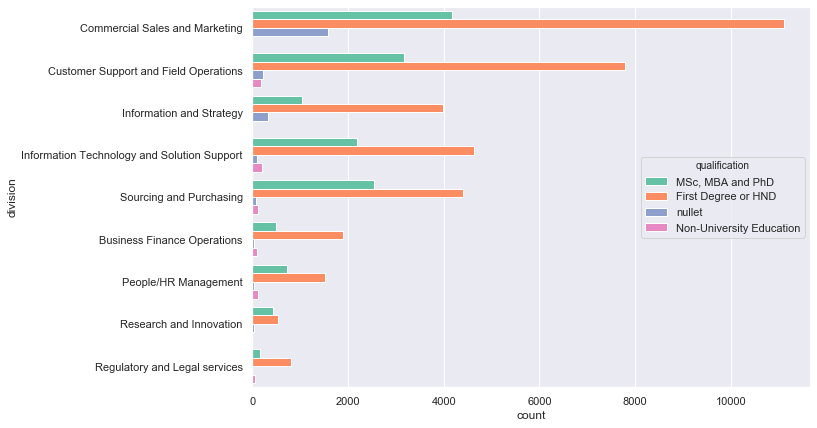

In [128]:

sns.set(rc={'figure.figsize':(10,7)})
sns.set(font_scale=1)
ax = sns.countplot(y="division", hue = "qualification", data=df, saturation=1, dodge=True, palette= 'Set2')

**Non-University Education** has no slot in the Commercial Sales and Marketing, \
Information and Strategy and Research and Innovation

## Age to filter
blox plot of the Age of people

In [132]:
msc = df.where(df.qualification =='MSc, MBA and PhD').dropna(how = 'all')

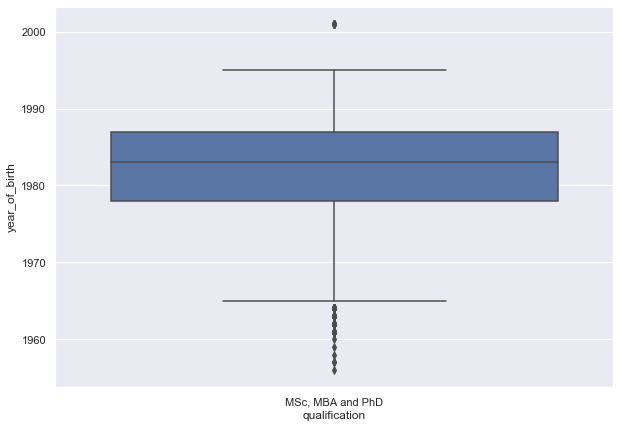

In [133]:
ax = sns.boxplot(x="qualification", y="year_of_birth", data=msc)

In [134]:
#the mean age recruiment

print(msc["year_of_birth"].mean())
print(msc['year_of_birth'].mode())
print(msc['year_of_birth'].median())

msc['year_of_birth'].describe()

1981.6458291457286
0    1987.0
dtype: float64
1983.0


count    14925.000000
mean      1981.645829
std          7.075548
min       1956.000000
25%       1978.000000
50%       1983.000000
75%       1987.000000
max       2001.000000
Name: year_of_birth, dtype: float64

In [135]:
msc["year_of_birth"].unique()

array([1986., 1988., 1989., 1982., 1979., 1971., 1990., 1980., 1983.,
       1975., 1974., 1957., 1987., 1984., 1981., 1985., 1978., 1977.,
       1991., 1972., 1969., 1976., 1964., 1968., 1995., 1970., 1973.,
       1965., 1993., 1963., 1962., 1961., 1967., 1966., 1992., 1994.,
       1956., 1959., 2001., 1958., 1960.])

In [136]:
len(msc["year_of_birth"].unique())

41

Since, 2001 is the max age, which is an outlier: Anyone older than 2001 does not a have MSC

In [137]:
msc['division'].unique()
len(msc['division'].unique())

9

### Okay, wait! 
### Thank God! Let's work with the count plot above
Starting for the division with the least nullet: \
**Regulatory and Legal services**

In [146]:
pd.crosstab((df['division']=='Regulatory and Legal services'), df.qualification)

qualification,First Degree or HND,"MSc, MBA and PhD",Non-University Education,nullet
division,,,,
False,35855,14769,740,2405
True,814,156,65,4


In [150]:
reg = df[df['division']=='Regulatory and Legal services']
reg

,employeeno,division,qualification,gender,channel_of_recruitment,trainings_attended,year_of_birth,last_performance_score,year_of_recruitment,targets_met,previous_award,training_score_average,state_of_origin,foreign_schooled,marital_status,past_disciplinary_action,previous_intradepartmental_movement,no_of_previous_employers,promoted_or_not
55,YAK/S/00085,Regulatory and Legal services,First Degree or HND,Male,Agency and others,2,1992,0.0,2018,0,0,57,ANAMBRA,Yes,Married,No,No,1,1
150,YAK/S/00209,Regulatory and Legal services,"MSc, MBA and PhD",Male,Direct Internal process,2,1971,12.5,2013,0,1,50,KADUNA,Yes,Married,No,No,0,0
186,YAK/S/00258,Regulatory and Legal services,First Degree or HND,Male,Direct Internal process,2,1987,12.5,2015,0,0,56,LAGOS,Yes,Married,No,No,0,0
194,YAK/S/00273,Regulatory and Legal services,Non-University Education,Male,Agency and others,2,1993,0.0,2018,0,0,54,RIVERS,Yes,Married,No,No,1,0
222,YAK/S/00312,Regulatory and Legal services,Non-University Education,Male,Agency and others,2,1996,12.5,2017,1,0,51,KANO,Yes,Married,No,No,1,0
309,YAK/S/00440,Regulatory and Legal services,First Degree or HND,Male,Agency and others,2,1990,7.5,2018,1,0,54,OSUN,Yes,Married,No,No,1,0
404,YAK/S/00566,Regulatory and Legal services,First Degree or HND,Male,Agency and others,2,1988,2.5,2013,0,0,58,LAGOS,Yes,Married,No,No,5,0
405,YAK/S/00568,Regulatory and Legal services,Non-University Education,Male,Agency and others,2,1994,0.0,2018,1,0,51,KATSINA,Yes,Married,No,No,0,0
521,YAK/S/00743,Regulatory and Legal services,"MSc, MBA and PhD",Male,Agency and others,2,1963,7.5,2004,1,0,52,ONDO,Yes,Married,No,No,1,0
545,YAK/S/00777,Regulatory and Legal services,First Degree or HND,Female,Agency and others,2,1969,7.5,2015,1,1,47,OSUN,Yes,Married,No,No,3,0


In [153]:
reg['gender'].value_counts()

Male      890
Female    149
Name: gender, dtype: int64

In [157]:
nullet_reg = reg.where(reg.qualification == 'nullet').dropna(how='all')
nullet_reg

,employeeno,division,qualification,gender,channel_of_recruitment,trainings_attended,year_of_birth,last_performance_score,year_of_recruitment,targets_met,previous_award,training_score_average,state_of_origin,foreign_schooled,marital_status,past_disciplinary_action,previous_intradepartmental_movement,no_of_previous_employers,promoted_or_not
7924,YAK/S/11210,Regulatory and Legal services,nullet,Male,Direct Internal process,2.0,1988.0,12.5,2016.0,0.0,0.0,48.0,FCT,Yes,Single,No,No,2,0.0
17533,YAK/S/25020,Regulatory and Legal services,nullet,Male,Direct Internal process,2.0,1989.0,7.5,2017.0,1.0,0.0,48.0,ANAMBRA,Yes,Married,No,No,0,0.0
20539,YAK/S/29315,Regulatory and Legal services,nullet,Male,Direct Internal process,2.0,1974.0,10.0,2013.0,1.0,0.0,48.0,FCT,Yes,Married,No,No,2,0.0
32213,YAK/S/45979,Regulatory and Legal services,nullet,Male,Direct Internal process,2.0,1988.0,7.5,2015.0,0.0,0.0,51.0,DELTA,Yes,Married,No,No,3,0.0


In [158]:
nullet_reg.year_of_birth

7924     1988.0
17533    1989.0
20539    1974.0
32213    1988.0
Name: year_of_birth, dtype: float64

In [ ]:
##Let's check for a trend in people who where in the reg div and where recruited through direct internal process